# Performance of some algorithms

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("../data/data1.csv", index_col=None)

In [11]:
data.head()

,Algorithm,Experiment Setting,X,Y
0,method1,exp1,1,1.0
1,method1,exp1,2,0.3
2,method1,exp1,3,1.2
3,method1,exp1,4,0.6
4,method2,exp1,1,1.0


In [21]:
def rename_exp(raw):
    if raw[-1] == '1':
        return "first exp"
    elif raw[-1] == '2':
        return "second exp"
    elif raw[-1] == '3':
        return "third exp"
    else:
        return "fourth exp"

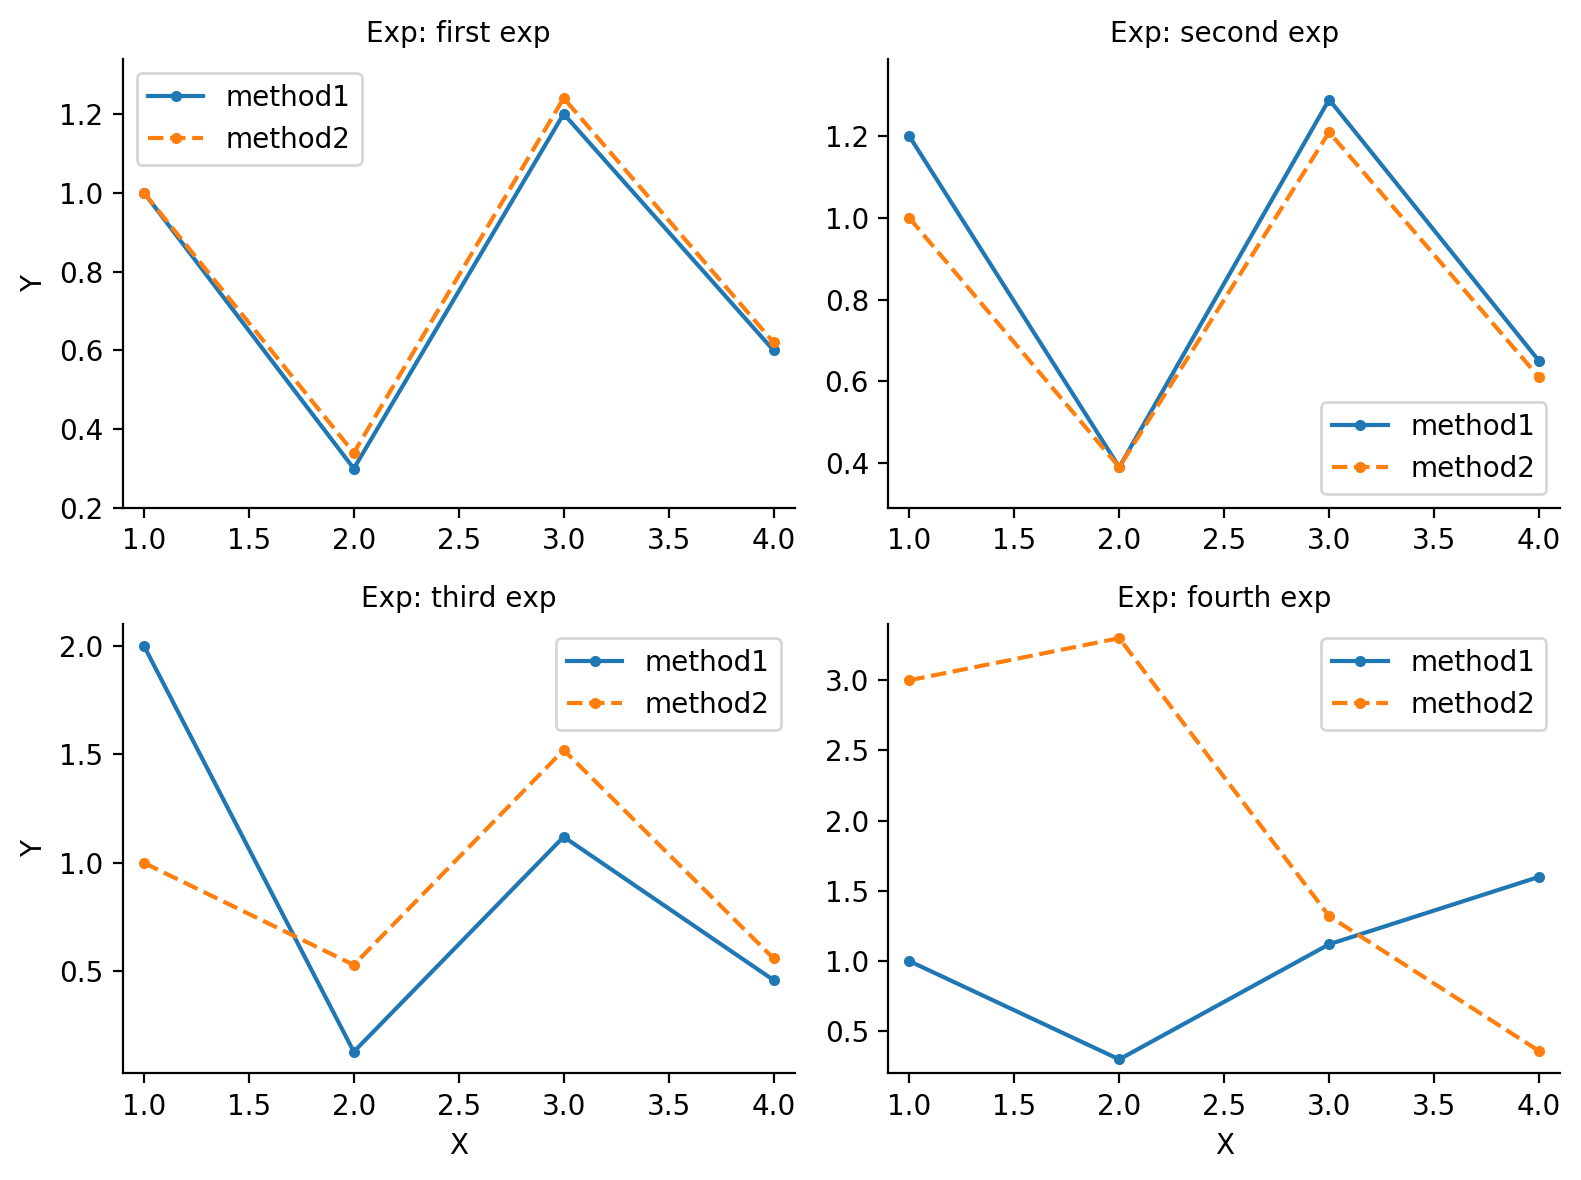

In [23]:
fig, axes = plt.subplots(2,2, figsize=(8,6), sharey=False, dpi=200)
for i, exp in enumerate(np.unique(data['Experiment Setting'])):
    ax = axes[i//2][i % 2]
    # method1
    filtered = data[(data['Experiment Setting'] == exp)&(data['Algorithm'] == 'method1')]
    ax.plot(
        filtered['X'],
        filtered['Y'],
        marker='.',
    )
    # method2
    filtered = data[(data['Experiment Setting'] == exp)&(data['Algorithm'] == 'method2')]
    ax.plot(
        filtered['X'],
        filtered['Y'],
        linestyle='dashed',
        marker='o',
        markersize=3,
    )
    # change ymin/ymax/xmin/xmax
    ymin = data.loc[(data['Experiment Setting'] == exp), 'Y'].min()-0.1
    ymax = data.loc[(data['Experiment Setting'] == exp), 'Y'].max()+0.1
    xmin = data.loc[(data['Experiment Setting'] == exp), 'X'].min()-0.1
    xmax = data.loc[(data['Experiment Setting'] == exp), 'X'].max()+0.1
    ax.set_ylim([ymin, ymax])
    ax.set_xlim([xmin, xmax])
    ax.legend(['method1', 'method2'])
    ax.set_title("Exp: " + rename_exp(exp), fontsize=10)
    #ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    if i == 0 or i == 2:
        ax.set_ylabel("Y")
    if i >= 2:
        ax.set_xlabel("X")
plt.tight_layout()
plt.show()